# Analyse de données - Spotify

Après divers observations j'ai décidé d'utiliser principalement le fichier tracks.csv\
Ma problématique est :\
Les critères de popularités qui permettrai à un(e) jeune artiste "touche à tout" d'orienter sa direction artistique.

L'approche :
- Observation initial du fichier
    - Type de données présentes
    - Réalisation d'une matrice de correlation afin d'avoir de nous orienter sur les caratéristiques que l'on va exploiter
- Production de données 
    - 1 diagramme avec données continues, type nuage de point ou histogramme
    - 2 diagrammes avec des données discrètes
    - 3 graphiques avec des données catégoriques
    - 1 boîte à moustaches
    - 1 heat map avec matrice de corrélation
- Conclusion

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
spotify_tracks = pd.read_csv('./datasets/spotify/tracks.csv');spotify_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


Notre population sera 586 672 éléments, ayant 20 caratéristiques.  
Regardons les différents caractéristiques présentent dans notre dataset afin de savoir celles qui pourront apparaître dans notre matrice de correlation.

In [77]:
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

Au vu de la problématique l'utilisation du 'popularity' est évidante, cette caractéristique sera notre référence principale afin de répondre à notre problématique.

In [113]:
spotify_tracks["popularity"].describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

On peut obverver un moyenne de 27.570053, associé à une variance de 18.370642 on pourrait avancer que la moyenne n'est pas représentative.
En regardant les quartiles on peut observer que la médianne (le 50% dans la cellule au dessus) se situe autour de 27 ce que est à 0.570053 notre moyenne. 
On voit aussi que 75% de notre population se situe entre 0 et 41.

Observont visuellement les données fournis par le discribe avec un graphique de distribution

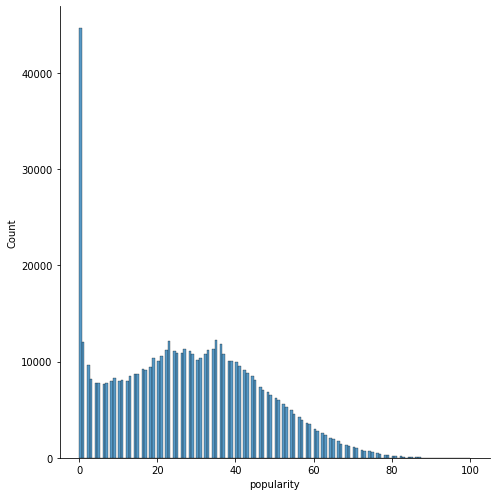

In [117]:
sns.displot(spotify_tracks["popularity"], height=7)

La matrice de distribution nous permet d'observer qu'une grande population à une population de 0.
On pourrait se poser des questions:
- Notre population ayant une population de 0 post-elle de la musique, si oui combien de titre à t-elle posté
- Y a t-il des correlations se rapprochant 1 entre certaines caractéristiques de notre dataset et cette population de 0?

À présent voyons la matrice de la matrice de correlation en ne prenant que les caractéristiques ayant un datatype numériques (int et float)

<AxesSubplot:>

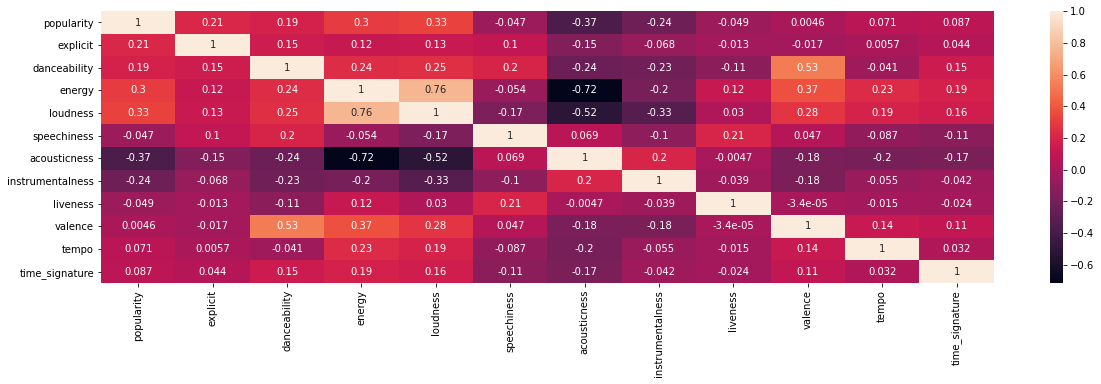

In [81]:
#spotify_tracks = spotify_tracks.iloc[:,[2,3,4,8,9,11,13,14,15,16,17,18,19]]; 
corr = spotify_tracks.iloc[:,[2,4,8,9,11,13,14,15,16,17,18,19]].corr()
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)

<AxesSubplot:xlabel='explicit', ylabel='popularity'>

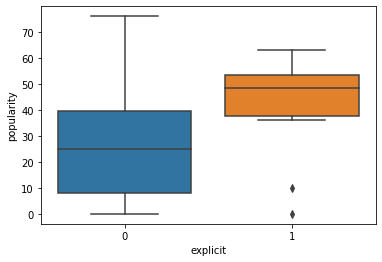

In [112]:
sns.boxplot(x="explicit", y="popularity", data=spotify_tracks.sample(300))

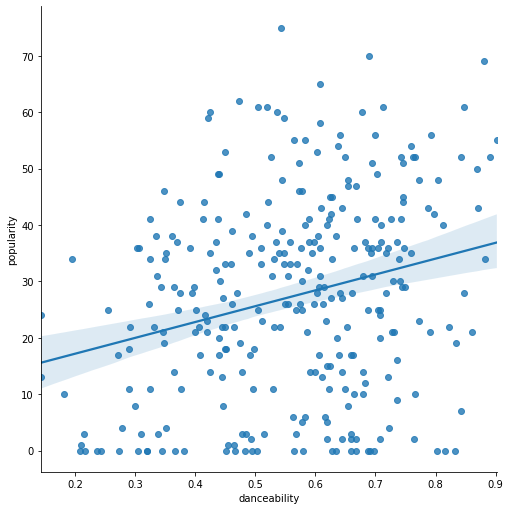

In [111]:
sns.lmplot(x="danceability", y="popularity", data=spotify_tracks.sample(300), height= 7)